In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
from scipy import optimize
from scipy.stats import norm

In [17]:
def line(x,m,b):
    return m*x + b

def gaussian(x, m , b, sigma):
    return (1 / np.sqrt(2*np.pi*sigma**2)) * np.exp(-(x-line(x,m,b)) / sigma**2)


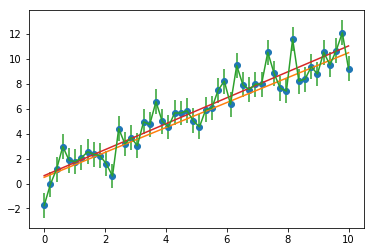

In [60]:
x = np.linspace(0,10) #signal
m_0 = 1 #True Values 
b_0 = 0.5
sigma = 1

data = line(x,m_0,b_0) + sigma*np.random.randn(50) #signal + noise
plt.plot(x,data,'o') #plot random data
plt.plot(x,line(x,m_0,b_0)) #signal
plt.errorbar(x, data, yerr = sigma) #plot random data + error bars

def log_likelihood(params):
    m,b = params
    return np.sum((data - line(x,m,b))**2) / sigma**2

result = optimize.minimize(log_likelihood , [0,0]) 
result['x'] # array displayed [m,b]

plt.plot(x,line(x,result['x'][0],result['x'][1]))

/Users/arinavsar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/arinavsar/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:670: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/arinavsar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


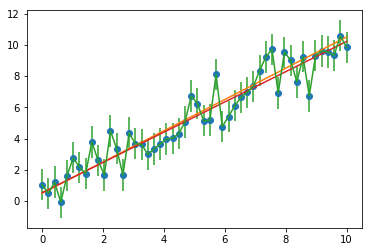

In [77]:
data = line(x,m_0,b_0) + sigma*np.random.randn(50) #signal + noise
plt.plot(x,data,'o') #plot random data
plt.plot(x,line(x,m_0,b_0)) #signal
plt.errorbar(x, data, yerr = sigma) #plot random data + error bars


#log prior Normal distribution of mean m_0 and variance 1
def log_p(params):
    m,b = params
    return -np.log(norm(loc = m_0, scale = 0.1).pdf(m)) - np.log(norm(loc = b_0, scale = 0.1).pdf(b))
#.pdf = probability distribution function
#scale = variance of your normal distribution
def log_posterior(params):
    return log_likelihood(params) + log_p(params)

result1 = optimize.minimize(log_posterior,[0,0]) 
plt.plot(x,line(x,result1['x'][0],result1['x'][1]))

/Users/arinavsar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


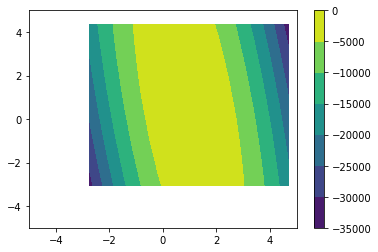

In [78]:
ms = np.linspace(-5,5,32)
bs = np.linspace(-5,5,32)
logpdf = np.zeros((32,32))

m_grid = np.zeros((32,32))
b_grid = np.zeros((32,32))
for i in range(32):
    for j in range(32):
        m_grid[i,j] = ms[i]
        b_grid[i,j] = bs[j]
        logpdf[i,j] = log_posterior([ms[i],bs[j]])
#plt.imshow(-logpdf)
plt.contourf(m_grid, b_grid, -logpdf)
plt.colorbar()
#plt.plot(bs,logpdf)

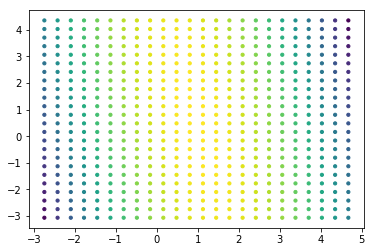

In [83]:
plt.scatter(m_grid, b_grid, c=-logpdf, s=10)

In [79]:
ms

array([-5.        , -4.67741935, -4.35483871, -4.03225806, -3.70967742,
       -3.38709677, -3.06451613, -2.74193548, -2.41935484, -2.09677419,
       -1.77419355, -1.4516129 , -1.12903226, -0.80645161, -0.48387097,
       -0.16129032,  0.16129032,  0.48387097,  0.80645161,  1.12903226,
        1.4516129 ,  1.77419355,  2.09677419,  2.41935484,  2.74193548,
        3.06451613,  3.38709677,  3.70967742,  4.03225806,  4.35483871,
        4.67741935,  5.        ])